In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
x_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

In [15]:
x_numpy.shape

(100, 1)

In [14]:
y_numpy.shape

(100,)

In [18]:
#get data
X = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))


In [35]:
print(y.shape)

torch.Size([100])


In [36]:
print(y.shape)
y=y.view(y.shape[0],1)
print(y.shape)

torch.Size([100])
torch.Size([100, 1])


In [32]:
print(X.shape)
print(y.shape)

torch.Size([100, 1])
torch.Size([100])


In [37]:
#DEFINE THE MODEL
n_samples,n_features = X.shape
input_size = n_features
op_size = 1
model = nn.Linear(input_size,op_size)


In [38]:
#loss and optimiser.
learning_rate = 0.01
criterion = nn.MSELoss() #loss function
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)



In [39]:
#training loop
epochs = 100
for epoch in range(epochs):
    #fwd pass
    y_predicted = model(X)
    loss = criterion(y_predicted,y)
    #backward
    loss.backward()
    #update
    optimizer.step()
    
    #clear grads now
    optimizer.zero_grad()
    if epoch%10==0:
        print('AT epoch ',epoch,'Loss is ',loss)

AT epoch  0 Loss is  tensor(5683.0620, grad_fn=<MseLossBackward>)
AT epoch  10 Loss is  tensor(4210.0347, grad_fn=<MseLossBackward>)
AT epoch  20 Loss is  tensor(3145.2129, grad_fn=<MseLossBackward>)
AT epoch  30 Loss is  tensor(2374.6016, grad_fn=<MseLossBackward>)
AT epoch  40 Loss is  tensor(1816.3235, grad_fn=<MseLossBackward>)
AT epoch  50 Loss is  tensor(1411.4786, grad_fn=<MseLossBackward>)
AT epoch  60 Loss is  tensor(1117.6335, grad_fn=<MseLossBackward>)
AT epoch  70 Loss is  tensor(904.1774, grad_fn=<MseLossBackward>)
AT epoch  80 Loss is  tensor(748.9991, grad_fn=<MseLossBackward>)
AT epoch  90 Loss is  tensor(636.1084, grad_fn=<MseLossBackward>)


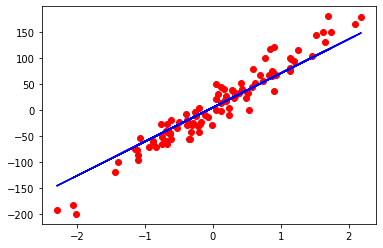

In [40]:
predicted = model(X).detach().numpy() # so that grad not tracked
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')